In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics, models
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [12]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [19]:
classes = ['airplane', 'automobile',' bird','cat','deer','dog ','frog ','horse','ship','truck']

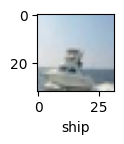

In [20]:
def plot_sample(X,y, index):
  plt.figure(figsize=(10,1))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 100)

In [21]:
X_train, X_test = X_train/255.0, X_test/255.0

In [30]:
model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense (3000, activation = 'relu'),
    layers.Dense (1000, activation = 'relu'),
    layers.Dense (10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2780 - loss: 2.2176
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3984 - loss: 1.6814
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4232 - loss: 1.6031
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4452 - loss: 1.5485
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4581 - loss: 1.5069


In [31]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4692 - loss: 1.4984


[1.5066033601760864, 0.4641000032424927]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.60      0.53      1000
           1       0.59      0.55      0.57      1000
           2       0.33      0.36      0.34      1000
           3       0.41      0.20      0.27      1000
           4       0.37      0.38      0.37      1000
           5       0.48      0.26      0.34      1000
           6       0.43      0.58      0.50      1000
           7       0.50      0.54      0.52      1000
           8       0.55      0.61      0.58      1000
           9       0.49      0.55      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense (3000, activation = 'relu'),
    layers.Dense (1000, activation = 'relu'),
    layers.Dense (10, activation = 'softmax')
])

In [44]:
cnn.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3442 - loss: 1.7350
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5693 - loss: 1.2016
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6397 - loss: 1.0161
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6781 - loss: 0.9063
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7166 - loss: 0.7984
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7432 - loss: 0.7226
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7705 - loss: 0.6360
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8015 - loss: 0.5588
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8230 - loss: 0.4919
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8536 - loss: 0.4079


In [45]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6992 - loss: 1.0425


[1.0283446311950684, 0.7028999924659729]

In [46]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.86      0.77      0.81      1000
           2       0.60      0.61      0.61      1000
           3       0.51      0.55      0.53      1000
           4       0.67      0.69      0.68      1000
           5       0.64      0.60      0.62      1000
           6       0.82      0.72      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.74      0.84      0.79      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

